### Computational Economics
Alexander Skorobogatov

# Topic 4.2. An optimal consumption/saving model with time-constant wage

The setup of the model:
Now an individual has two source of income - wage $w$ and interest in the account $r$ so that his saving grows as

$$\dot{x} = w + rx - c$$

The remaining assumptions are the same

### The problem
The individual again wishes to  
$$ \max \int_{0}^{T} \exp(-\rho t) \ln c dt $$
subject to

$$\dot{x} = w + rx - c$$
$$x(0) = x_0$$
$$x(T) = b$$

### Solution
A step-by-step procedure is the same

### The problem and the general solution

In [272]:
from IPython import get_ipython;
get_ipython().magic('reset -sf')

C:\Users\Alex\AppData\Local\Temp\ipykernel_3168\2091633686.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [273]:
#pip install sympy
from sympy import diff, symbols, ln, Eq, solve, dsolve, Function, Derivative, exp, integrate, powsimp, simplify

# Introduce symbols
w, r, t, rho = symbols('w r t rho')
# Introduce functions
c = Function('c')(t)
x = Function('x')(t)
mu = Function('mu')(t)

# 1. Hamiltonian
H = ln(c) + mu*(w + r*x - c)
# subject to
st1 = w + r*x - c

# 2. FOC1 for the control variable c
foc1 = Eq(diff(H,c), 0).simplify()
c_s = solve(foc1,c)[0] # solve for c
eq = Eq(c,c_s)
eq

Eq(c(t), 1/mu(t))

In [274]:
# 3. FOC for the state variable x
mut = mu.diff()

foc2 = Eq(diff(H,x), rho*mu - mut).simplify()
mut_s = solve(foc2,mut)[0]
de1 = Eq(mut,mut_s)

# The first resultant de
de1

Eq(Derivative(mu(t), t), (-r + rho)*mu(t))

In [275]:
# 4. Plug foc1 in the constraint st1
xt = x.diff()
xt2 = st1.subs(c, c_s)
de2 = Eq(xt, xt2)

# the second resultant de:
de2

Eq(Derivative(x(t), t), r*x(t) + w - 1/mu(t))

Thus, the system of differential equations to solve for optimal path for saving is given by de1 and de2:
$$\dot{\mu} = \mu(\rho - r)$$
$$\dot{x} = w + rx - \mu^{-1}$$

In [276]:
# 5. Solve de1
ds1 = dsolve(Derivative(mu) - mu*(rho-r), mu)
ds_r = solve(ds1,mu)[0]
ds1

Eq(mu(t), C1*exp(t*(-r + rho)))

In [277]:
# 6. Rewrite de2
plug = de2.subs(mu,ds_r) # plug the solution
int_factor = exp(-r*t)

lhs = -solve(plug,ds_r)[0]**(-1)*int_factor # left-hand side: times -1, times int. factor, power of -1
rhs = powsimp(-solve(ds1,mu)[0]**(-1)*int_factor) # Right-hand side: the same

ds2 = Eq(lhs,rhs) # solve for the solution and multiply by int. factor
ds2

Eq((-r*x(t) - w + Derivative(x(t), t))*exp(-r*t), -exp(-rho*t)/C1)

In [278]:
# Rewrite
ds3 = Eq(lhs.subs(w,0),rhs + w*int_factor)
ds3

Eq((-r*x(t) + Derivative(x(t), t))*exp(-r*t), w*exp(-r*t) - exp(-rho*t)/C1)

In [279]:
# Integrate rhs and simplify
C1, C2 = symbols('C1 C2') # introduce the integration constants
rhs_integ = (simplify(integrate(rhs + w*int_factor,(t,0,t),
                                conds='separate'))+C2)*int_factor**-1 # integrate rhs and solve for x moving the int.factor
solution1 = Eq(x,rhs_integ)
solution1

Eq(x(t), (C2 + w/r - w*exp(-r*t)/r - 1/(C1*rho) + exp(-rho*t)/(C1*rho))*exp(r*t))

Thus, $x(t)$ given by the solution1 is an optimal path of saving  

### Private solution with the account of boundary conditions

In [280]:
rhs_integ

(C2 + w/r - w*exp(-r*t)/r - 1/(C1*rho) + exp(-rho*t)/(C1*rho))*exp(r*t)

In [281]:
# 9. Solution for C2
x0, xT, T = symbols('x0 xT T')
sol2 = rhs_integ.subs(t,0)
sol2 = x0
sol2

x0

In [282]:
# 10. Solution for C1
sol1 = rhs_integ.subs({t:T,C2:sol2})
sol1 = Eq(xT,sol1)
sol1 = solve(sol1, C1)[0]
sol1

r*(exp(T*rho) - 1)*exp(T*(r - rho))/(rho*(r*x0*exp(T*r) - r*xT + w*exp(T*r) - w))

In [283]:
# 11. Plug the solutions for constraints
x_sol = rhs_integ.subs({C1:sol1,C2:sol2})
x_sol

(x0 + w/r - w*exp(-r*t)/r - (r*x0*exp(T*r) - r*xT + w*exp(T*r) - w)*exp(-T*(r - rho))/(r*(exp(T*rho) - 1)) + (r*x0*exp(T*r) - r*xT + w*exp(T*r) - w)*exp(-T*(r - rho))*exp(-rho*t)/(r*(exp(T*rho) - 1)))*exp(r*t)

In [284]:
# From this derive consumption path
eq = eq.subs(mu,ds_r)
c_sol = eq.subs(C1,sol1)
c_sol

Eq(c(t), rho*(r*x0*exp(T*r) - r*xT + w*exp(T*r) - w)*exp(-T*(r - rho))*exp(-t*(-r + rho))/(r*(exp(T*rho) - 1)))

In [285]:
# Savings
sav = st1.subs({x:x_sol,c:c_sol.rhs})
sav

r*(x0 + w/r - w*exp(-r*t)/r - (r*x0*exp(T*r) - r*xT + w*exp(T*r) - w)*exp(-T*(r - rho))/(r*(exp(T*rho) - 1)) + (r*x0*exp(T*r) - r*xT + w*exp(T*r) - w)*exp(-T*(r - rho))*exp(-rho*t)/(r*(exp(T*rho) - 1)))*exp(r*t) + w - rho*(r*x0*exp(T*r) - r*xT + w*exp(T*r) - w)*exp(-T*(r - rho))*exp(-t*(-r + rho))/(r*(exp(T*rho) - 1))

### Numerical examples

In [286]:
# Introduce the dictionary of parameters
param = [x0, xT, t, T, r, rho, w] # list of parameters
values = [100, 0, 1, 720, 0.01, 0.005, 100] # list of their values

In [287]:
val = dict(zip(param,values))
print(x_sol.subs(val))
print(c_sol.rhs.subs(val))
print(sav.subs(val))

149.235836814149
52.1402825066697
49.3520758614718


In [288]:
# Check the impact the parameters on the resultant calculations
val2 = val.copy()
val2[xT] = 10000 # we want to leave a legacy
print(x_sol.subs(val2))

val2 = val.copy()
val2[t] = 240 # a half-life is gone
print(x_sol.subs(val2))

val2 = val.copy()
val2[T] = 252 # a shorter life
print(x_sol.subs(val2))

val2 = val.copy()
val2[r] = 0.1 # a righer return
print(x_sol.subs(val2))

val2 = val.copy()
val2[rho] = 0.05 # a higher preference of current consumption over future
print(x_sol.subs(val2))

val2 = val.copy()
val2[w] = 0 # check
print(x_sol.subs(val2))

149.274503688892
21406.7794527805
136.137496878920
209.454415639756
-295.658890957693
100.487100692469


In [289]:
# Form the table
c = []
x = []
s = []
for i in range(1,720+1):
    val[t] = i
    c.append(c_sol.rhs.subs(val))
    x.append(x_sol.subs(val))
    s.append(sav.subs(val))

In [290]:
# Compare saving variable with changes of capital
import numpy as np
li1 = np.array(x)[1:] - np.array(x)[:-1] # fd of capital
li2 = (np.array(s)[1:] + np.array(s)[:-1])/2 # mean of pairs of values of sav

In [291]:
arr1 = np.array([c,s,x]).T
arr1.shape

(720, 3)

In [292]:
arr2 = np.array([li1,li2]).T
arr2.shape

(719, 2)

In [293]:
arr2 = np.vstack([arr2,['NAN','NAN']])
arr2.shape

(720, 2)

In [294]:
import pandas as pd
col=['cons','sav','cap','d_cap1','d_cap2']
arr3 = np.concatenate((arr1, arr2),axis=1)
data = pd.DataFrame(arr3, columns=col).astype('float')
data

,cons,sav,cap,d_cap1,d_cap2
0,52.140283,49.352076,1.492358e+02,49.468656,49.468742
1,52.401637,49.585408,1.987045e+02,49.702503,49.702589
2,52.664301,49.819769,2.484070e+02,49.937379,49.937465
3,52.928282,50.055162,2.983444e+02,50.173290,50.173376
4,53.193586,50.291591,3.485177e+02,50.410238,50.410325
...,...,...,...,...,...
715,1861.127613,-1691.343078,6.978454e+03,-1704.504204,-1704.530069
716,1870.456554,-1717.717061,5.273949e+03,-1731.033937,-1731.060082
717,1879.832257,-1744.403102,3.542915e+03,-1757.877411,-1757.903839
718,1889.254955,-1771.404575,1.785038e+03,-1785.038017,-1785.064730


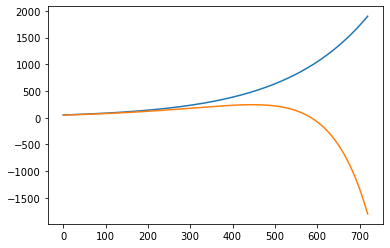

In [295]:
import matplotlib.pyplot as plt
plt.plot(data['cons'], label = "line 1")
plt.plot(data['sav'], label = "line 2")

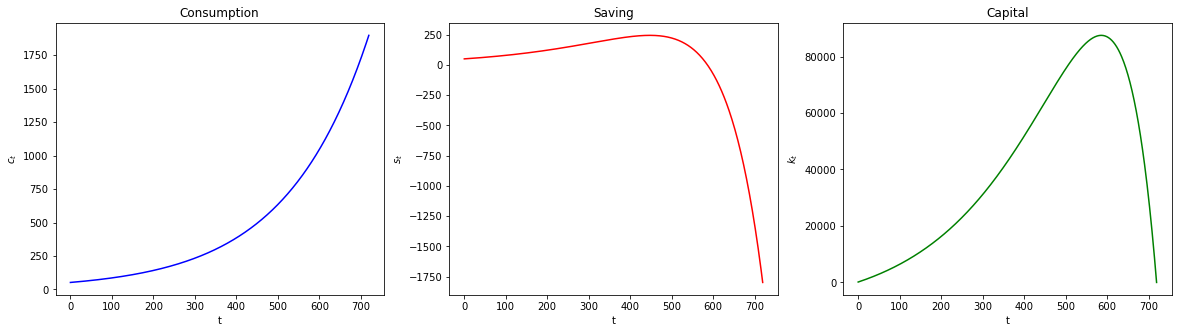

In [296]:
fig, axs = plt.subplots(1,3, figsize=(20, 5))

colors = ['blue', 'red', 'green']
titles = ['Consumption', 'Saving', 'Capital']
ylabels = ['$c_t$', '$s_t$', '$k_t$']

li =  ['cons','sav','cap']
for i in range(len(li)):
    a = li[i]
    axs[i].plot(data[a], c=colors[i])
    axs[i].set(xlabel='t', ylabel=ylabels[i], title=titles[i])
    
plt.show()

### Let's play with the model parameters

In [297]:
param = [t, x0, xT, T, r, rho, w] # list of parameters

# 1. base-line, 2. nonzero legacy, 3. longer life, 4. higher rate, 5. higher rho, 6. higher wage
par_li = [1, 1, 100, 1440, 0.1, 0.5, 5]

for i in range(1,len(par_li)):
    values = [1, 1, 0, 720, 0.01, 0.005, 1] # list of their values
    values[i] = par_li[i]
    val = dict(zip(param,values))
    c = []
    x = []
    s = []
    for j in range(1,720+1):
        val[t] = j
        c.append(c_sol.rhs.subs(val))
        x.append(x_sol.subs(val))
        s.append(sav.subs(val))
    arr = np.array([c,s,x]).T
    col=['cons','sav','cap']
    exec("data"+str(i)+" = pd.DataFrame(arr, columns=col).astype('float')")

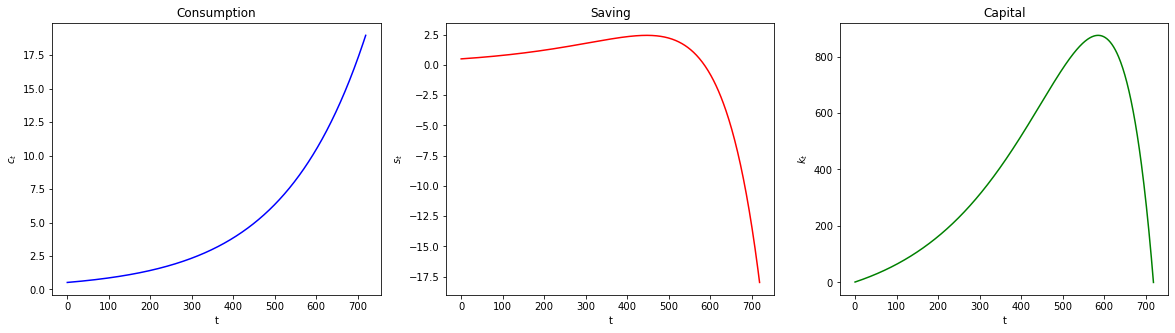

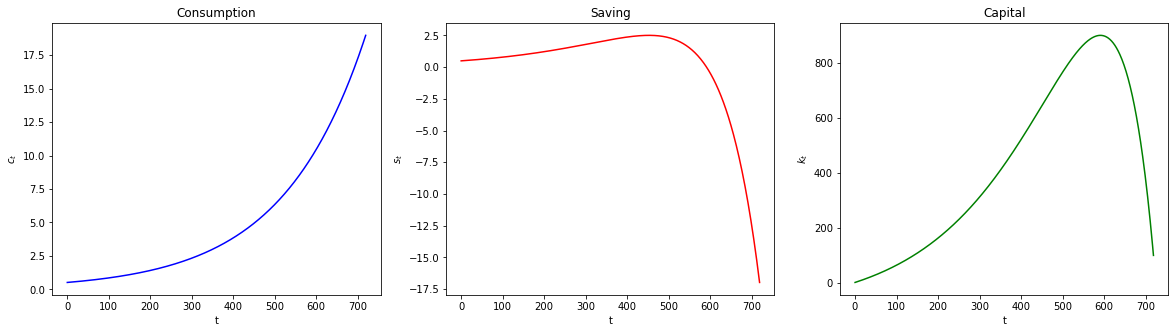

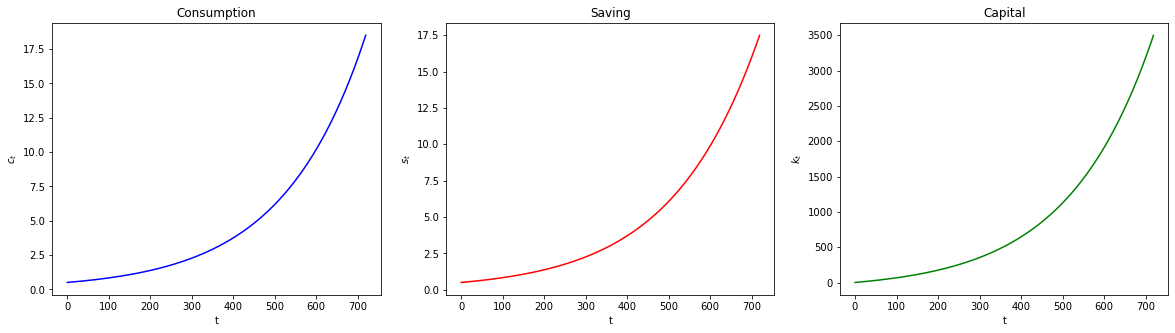

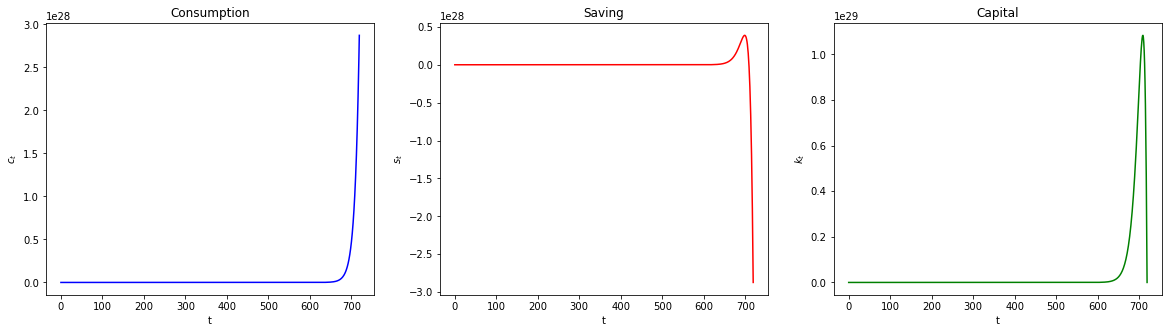

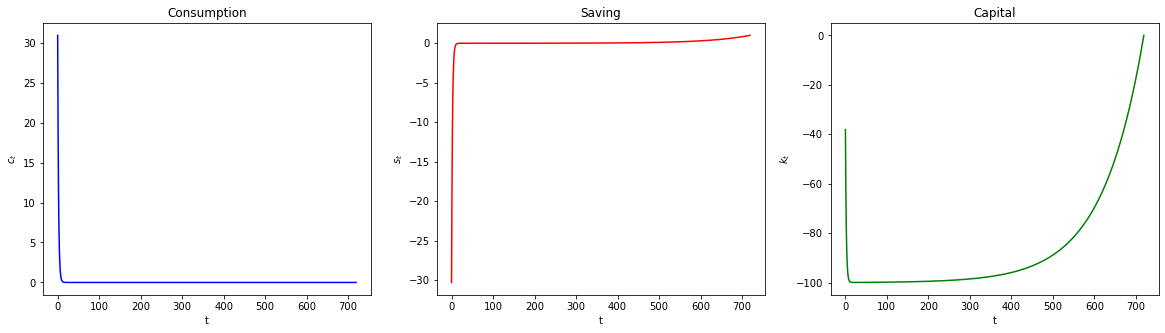

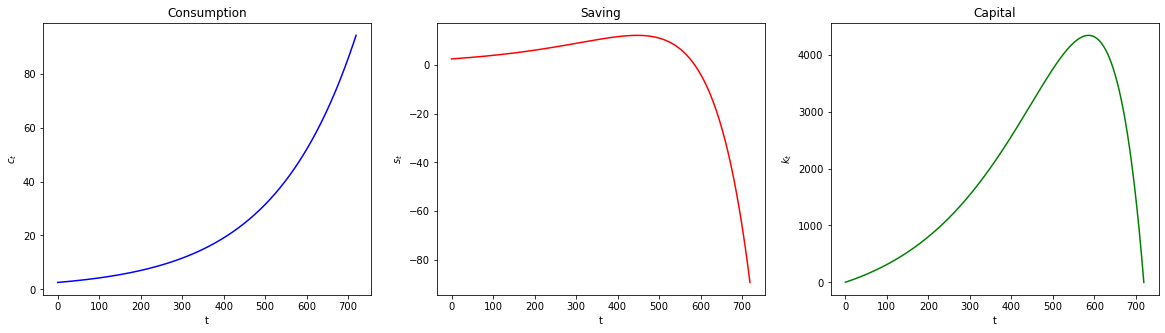

In [298]:
d = [data1,data2,data3,data4,data5,data6]
colors = ['blue', 'red', 'green']
titles = ['Consumption', 'Saving', 'Capital']
ylabels = ['$c_t$', '$s_t$', '$k_t$']
li =  ['cons','sav','cap']

for i in d:
    fig, axs = plt.subplots(1,3, figsize=(20, 5))
    for j in range(len(li)):
        a = li[j]
        axs[j].plot(i[a], c=colors[j])
        axs[j].set(xlabel='t', ylabel=ylabels[j], title=titles[j])    
    plt.show()